## Loading Model and Testdataset

In [53]:
from importlib.machinery import SourceFileLoader
import torch
from torchvision.transforms import transforms
from matplotlib import rcParams

rcParams['figure.figsize'] = 6.4, 4.8

In [54]:
focus_resnet_module = SourceFileLoader("focus_resnet_module", "../src/models/focus_resnet_module.py").load_module()

from focus_resnet_module import ResNetLitModule
model = ResNetLitModule.load_from_checkpoint("../logs/experiments/runs/focusResNet101pretrained_150/2022-03-21_08-48-33/checkpoints/epoch_078.ckpt")

model.eval()
model.freeze()


In [55]:

focus_datamodule = SourceFileLoader("focus_datamodule", "../src/datamodules/focus_datamodule.py").load_module()
from focus_datamodule import FocusDataSet

trans = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.ConvertImageDtype(torch.float),
        ]
    )

ds = FocusDataSet("../data/focus150/test_metadata.csv", "../data/focus150/", transform=trans, 
                additional_col_list=["stack_id","original_filename", "obj_name"],)

counter = 0
#for d in ds:
#    counter += 1
#    break

print(counter)

ds[1]

0


{'image': tensor([[[0.5490, 0.5490, 0.5451,  ..., 0.9961, 1.0000, 1.0000],
          [0.5608, 0.5569, 0.5529,  ..., 0.9569, 0.9765, 1.0000],
          [0.5725, 0.5686, 0.5647,  ..., 0.9373, 0.9569, 0.9843],
          ...,
          [0.9882, 0.9765, 0.9608,  ..., 0.4078, 0.3922, 0.3843],
          [0.9882, 0.9765, 0.9569,  ..., 0.4706, 0.4510, 0.4314],
          [0.9922, 0.9765, 0.9569,  ..., 0.5059, 0.4863, 0.4627]],
 
         [[0.3922, 0.3922, 0.3882,  ..., 0.8941, 0.9373, 0.9686],
          [0.4039, 0.4000, 0.3961,  ..., 0.8549, 0.8941, 0.9294],
          [0.4157, 0.4118, 0.4078,  ..., 0.8392, 0.8745, 0.9098],
          ...,
          [0.7922, 0.7804, 0.7647,  ..., 0.2588, 0.2471, 0.2392],
          [0.7922, 0.7804, 0.7608,  ..., 0.3098, 0.2941, 0.2863],
          [0.7922, 0.7765, 0.7569,  ..., 0.3490, 0.3255, 0.3098]],
 
         [[0.0588, 0.0588, 0.0549,  ..., 0.8039, 0.8314, 0.8627],
          [0.0706, 0.0667, 0.0627,  ..., 0.7569, 0.7882, 0.8118],
          [0.0745, 0.0706, 0.06

In [56]:
#model()

ys = []
preds = []
for d in ds:
    x = d["image"]
    y = d["focus_height"]

    x = x.unsqueeze(0)

    preds.append(model(x).numpy())
    ys.append(y.numpy())

#print(f"pred:   {preds}")
#print(f"target: {ys}")

list(zip(preds, ys))

[(array([[-0.02682571]], dtype=float32), array(-0.020508, dtype=float32)),
 (array([[-0.02211046]], dtype=float32), array(-0.03418, dtype=float32)),
 (array([[-0.00538737]], dtype=float32), array(-0.00586, dtype=float32)),
 (array([[0.01774073]], dtype=float32), array(0.020508, dtype=float32)),
 (array([[-0.00711724]], dtype=float32), array(-0.006836, dtype=float32)),
 (array([[-0.02278123]], dtype=float32), array(-0.011719, dtype=float32)),
 (array([[0.01155102]], dtype=float32), array(0.03418, dtype=float32)),
 (array([[0.02381875]], dtype=float32), array(0.011719, dtype=float32)),
 (array([[0.00137932]], dtype=float32), array(0., dtype=float32)),
 (array([[-0.02463626]], dtype=float32), array(-0.046876, dtype=float32)),
 (array([[-0.00869302]], dtype=float32), array(-0.006835, dtype=float32)),
 (array([[0.02585026]], dtype=float32), array(0.011719, dtype=float32)),
 (array([[0.00376954]], dtype=float32), array(0.017578, dtype=float32)),
 (array([[0.0029907]], dtype=float32), array(0

0.021971773

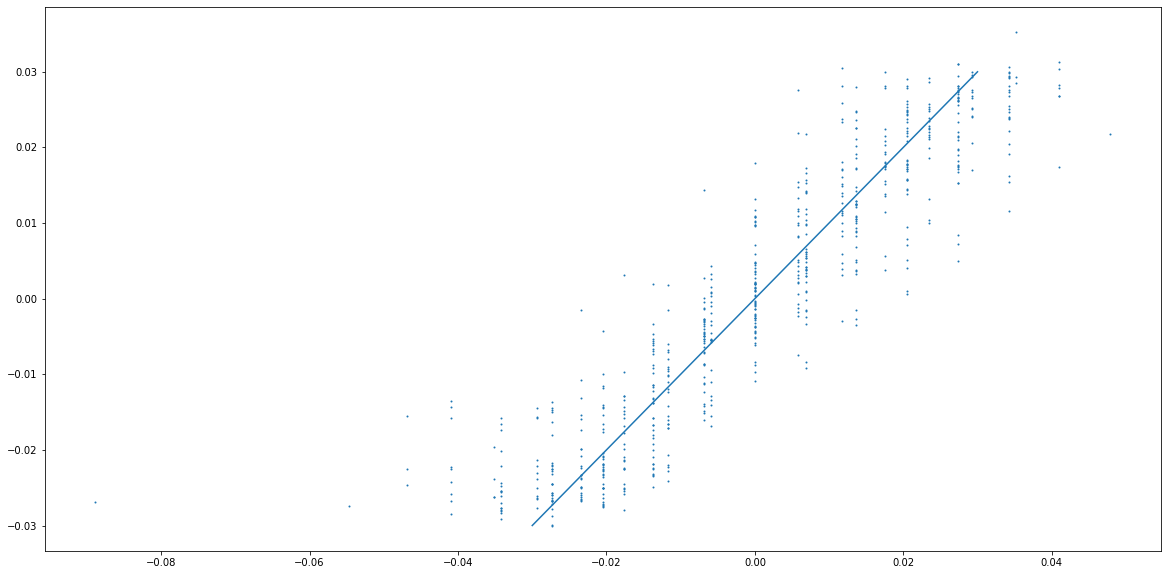

In [57]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(ys, preds, s=1)
plt.plot([-0.03, 0.03],[-0.03,0.03])

np.mean(np.abs(np.array(ys) - np.array(preds)))

<BarContainer object of 20 artists>

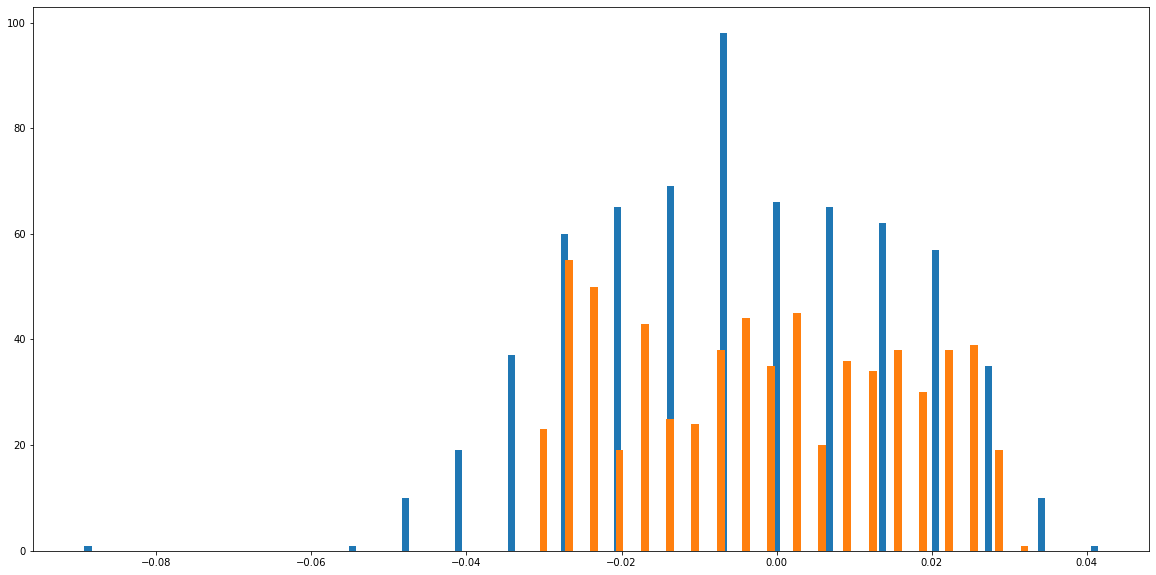

In [58]:
# actual data
hist_y, hist_x  = np.histogram(ys, bins=20)
plt.bar(hist_x[:len(hist_y)], hist_y, width=0.001)

# predictions
hist_y, hist_x  = np.histogram(preds, bins=20)
plt.bar(hist_x[:len(hist_y)], hist_y, width=0.001)


Type: trichuris
MAE: 0.020810753107070923


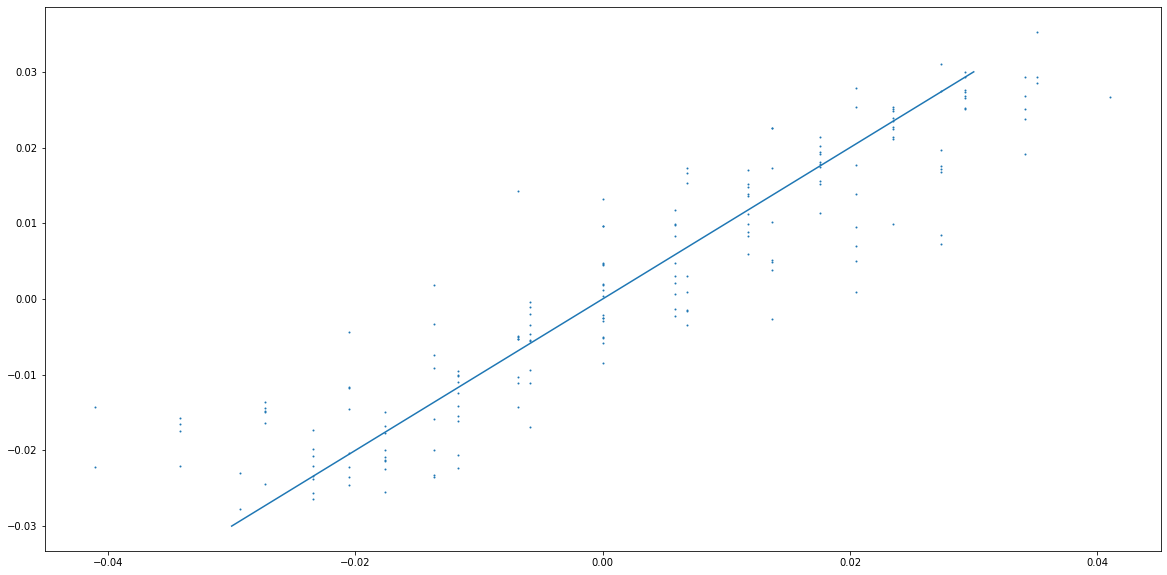

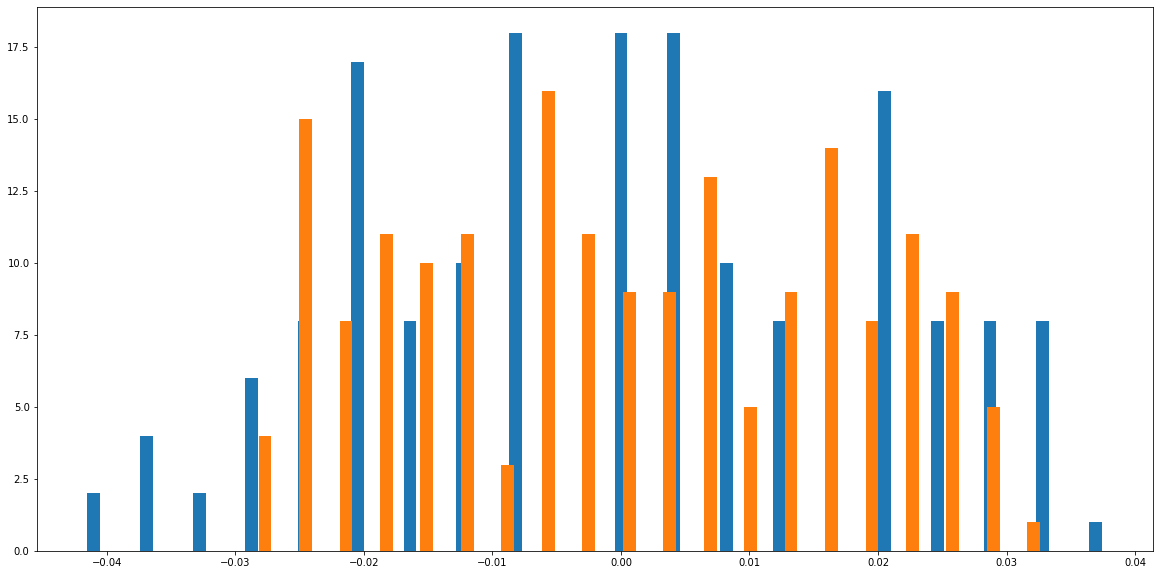

Type: ascaris
MAE: 0.022002553567290306


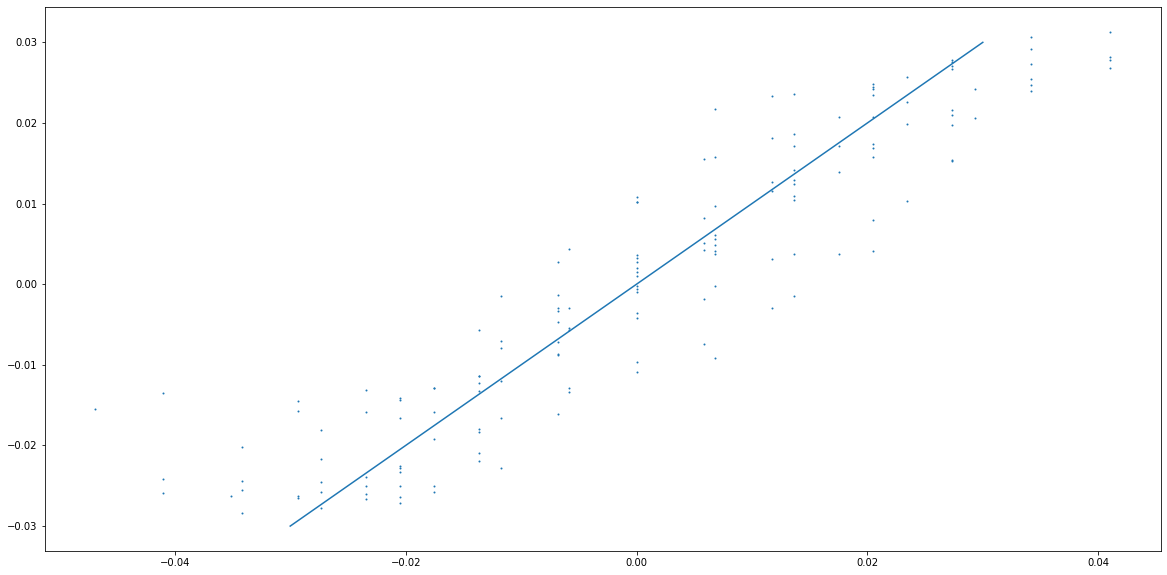

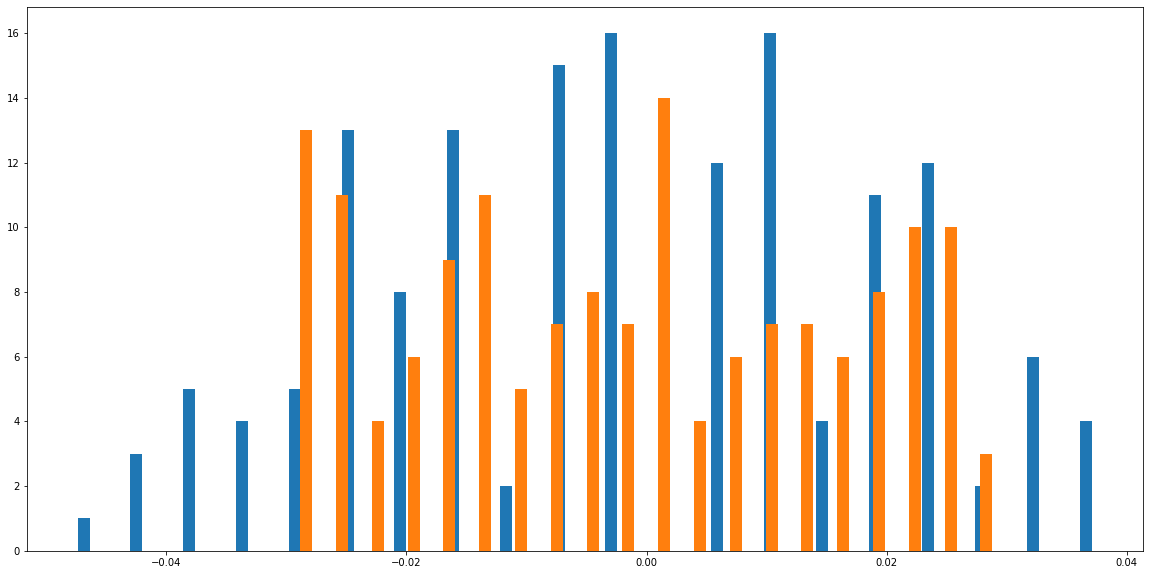

Type: schistosoma
MAE: 0.0228531863540411


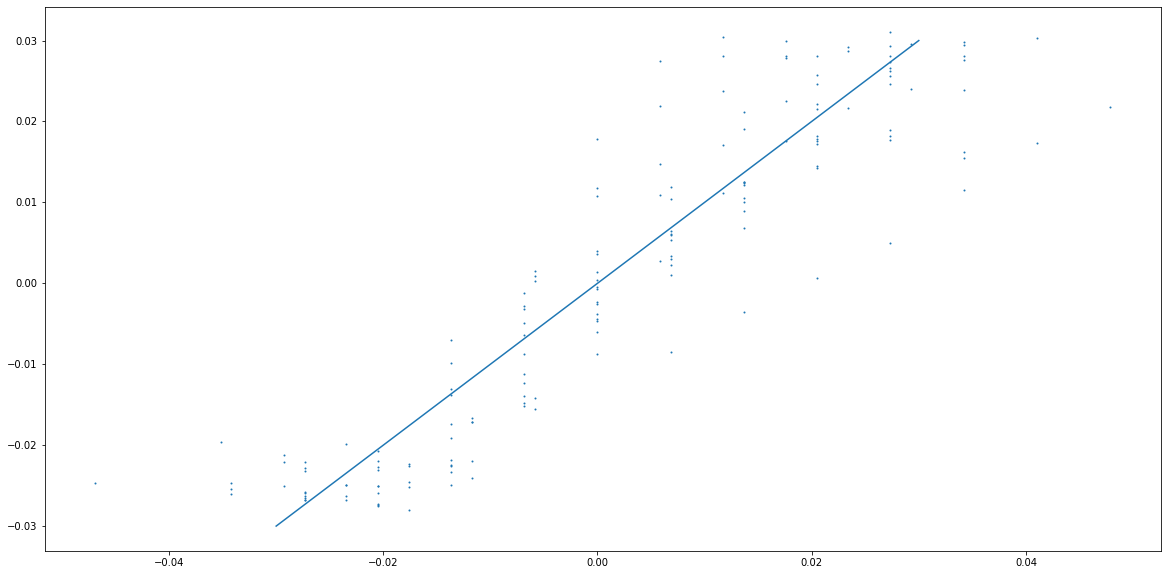

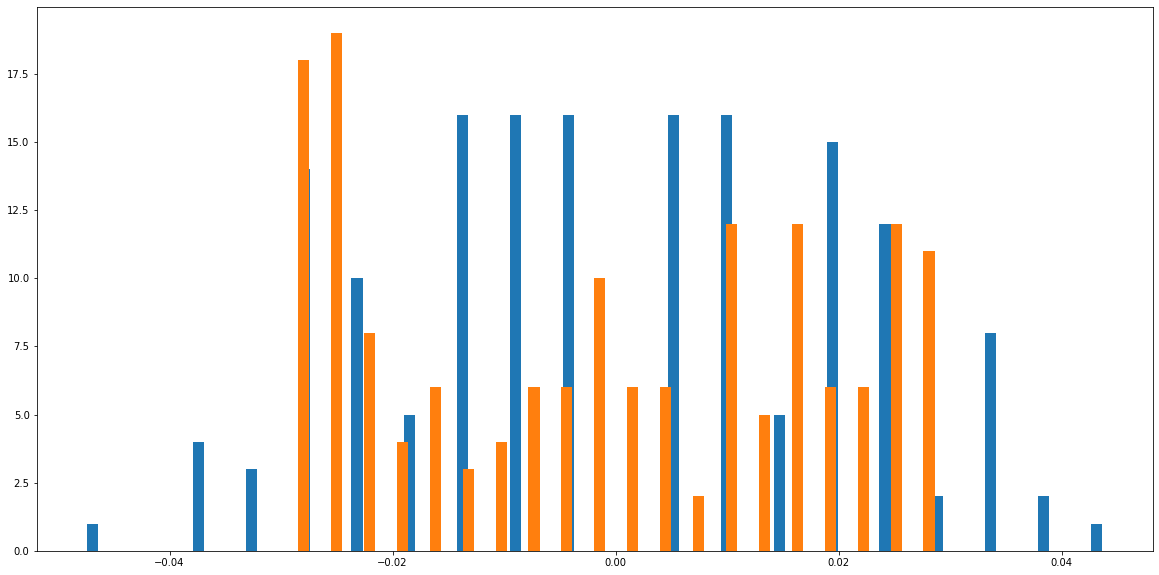

Type: hookworm
MAE: 0.02194376476109028


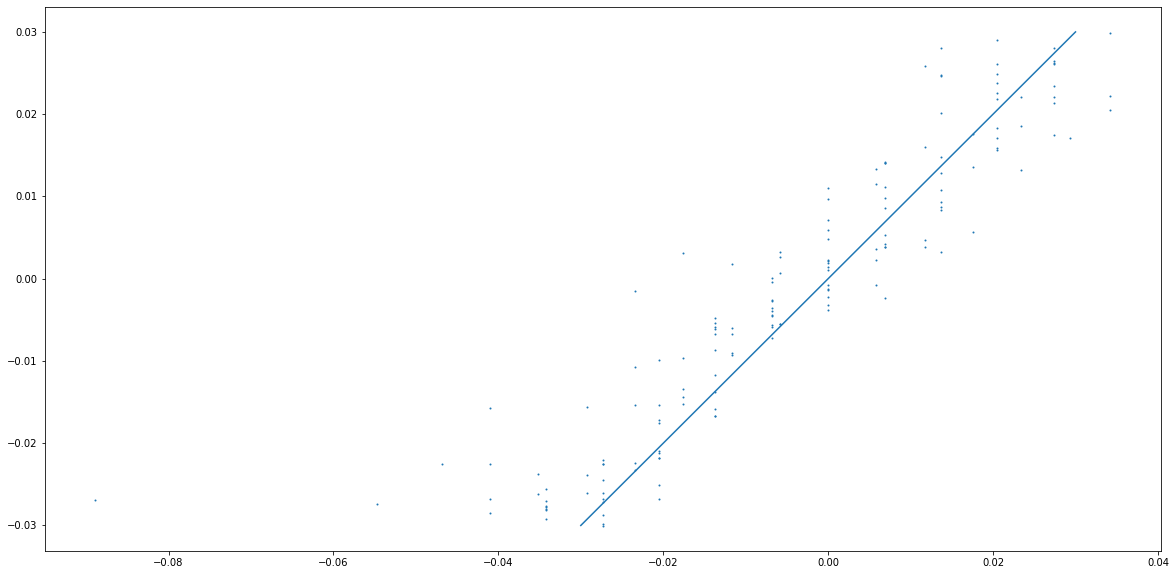

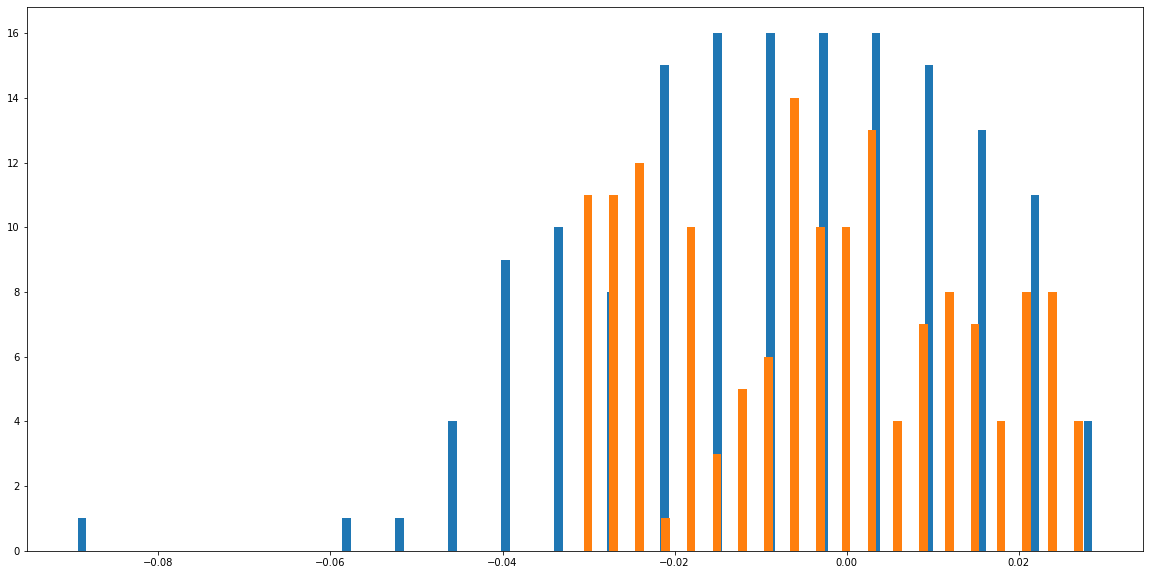

In [59]:
for type in ["trichuris", "ascaris", "schistosoma", "hookworm"]:
    ys = []
    preds = []
    
    for d in ds:
        if type == d["obj_name"]:
            x = d["image"]
            y = d["focus_height"]

            x = x.unsqueeze(0)

            preds.append(model(x).numpy())
            ys.append(y.numpy())
    
    print(f"Type: {type}")
    print(f"MAE: {np.mean(np.abs(np.array(ys) - np.array(preds)))}")
    plt.scatter(ys, preds, s=1)
    plt.plot([-0.03, 0.03],[-0.03,0.03])

    np.mean(np.abs(np.array(ys) - np.array(preds)))
    plt.show()

    # actual data
    _hist_y, _hist_x  = np.histogram(ys, bins=20)
    plt.bar(_hist_x[:len(_hist_y)], _hist_y, width=0.001)

    # predictions
    _hist_y, _hist_x  = np.histogram(preds, bins=20)
    plt.bar(_hist_x[:len(_hist_y)], _hist_y, width=0.001)
    plt.show()



## Showing actual image

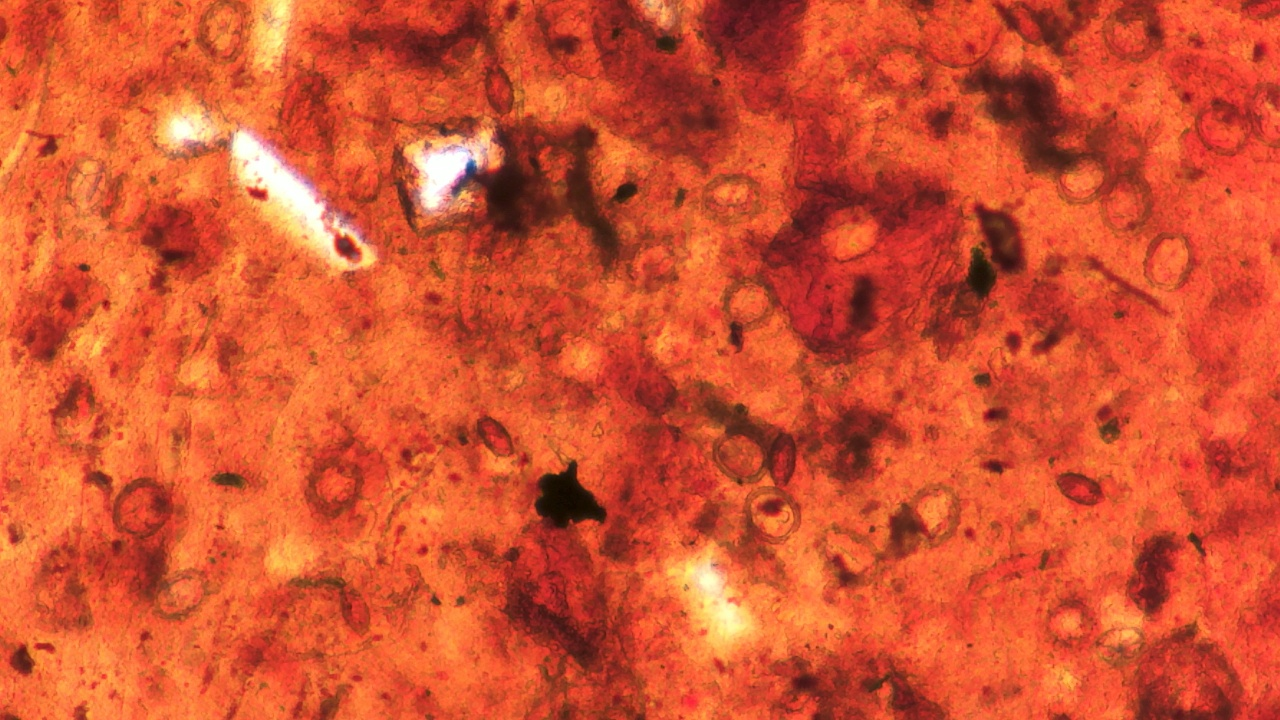

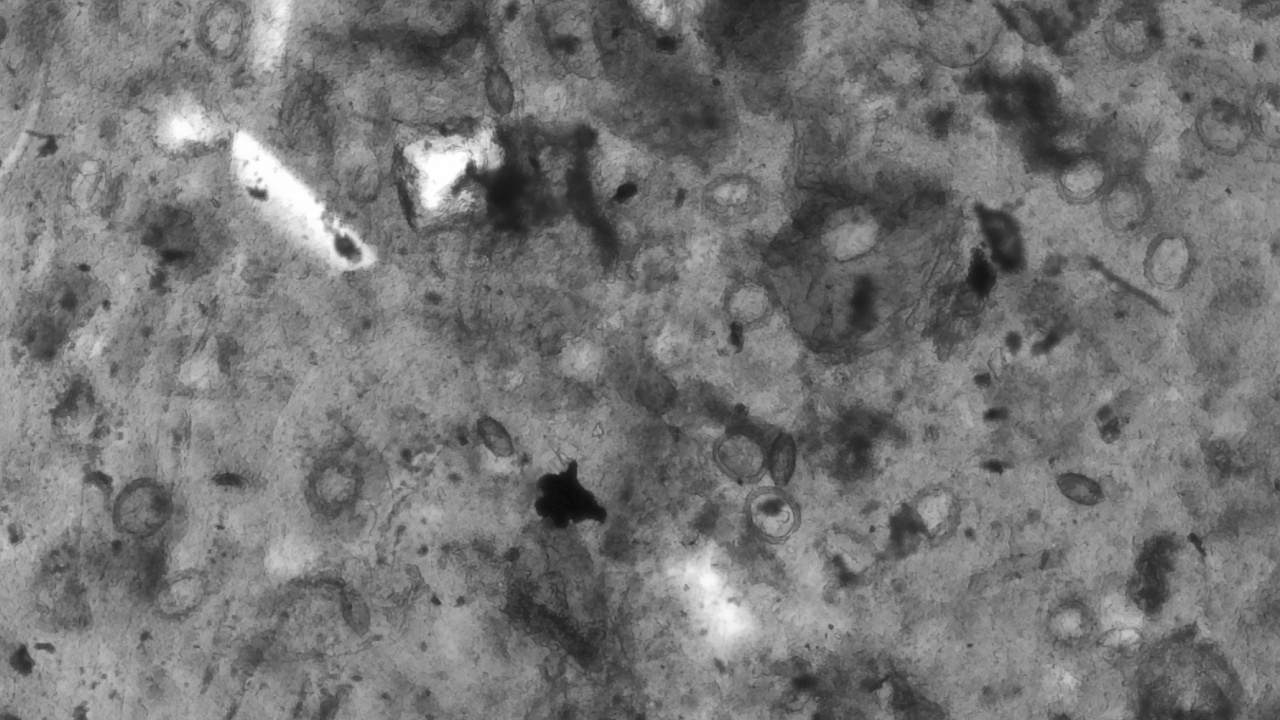

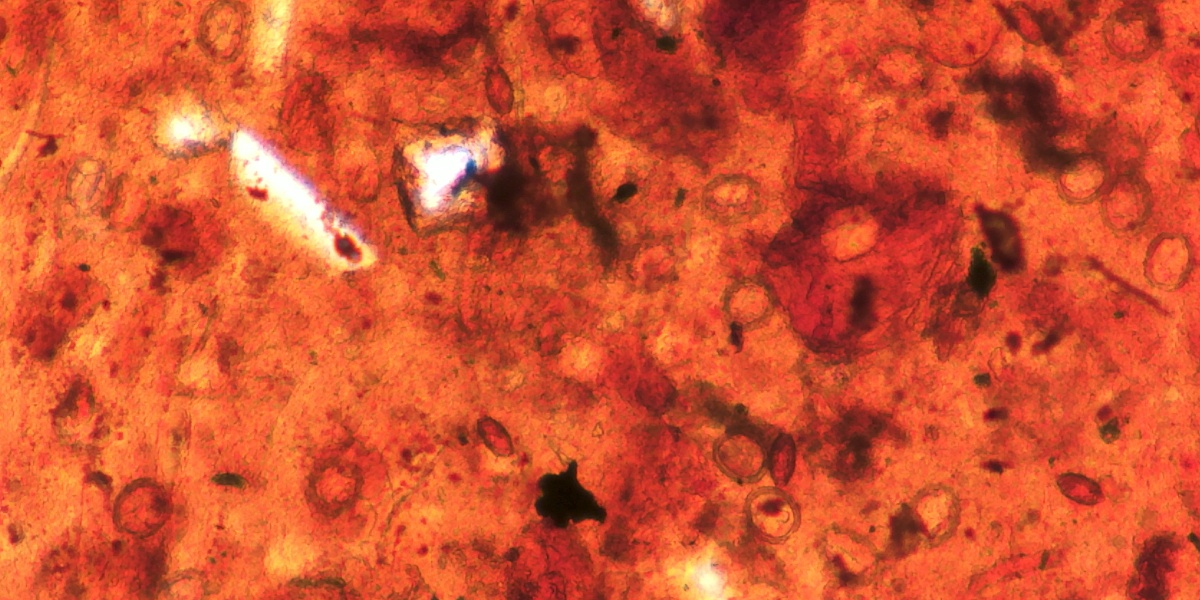

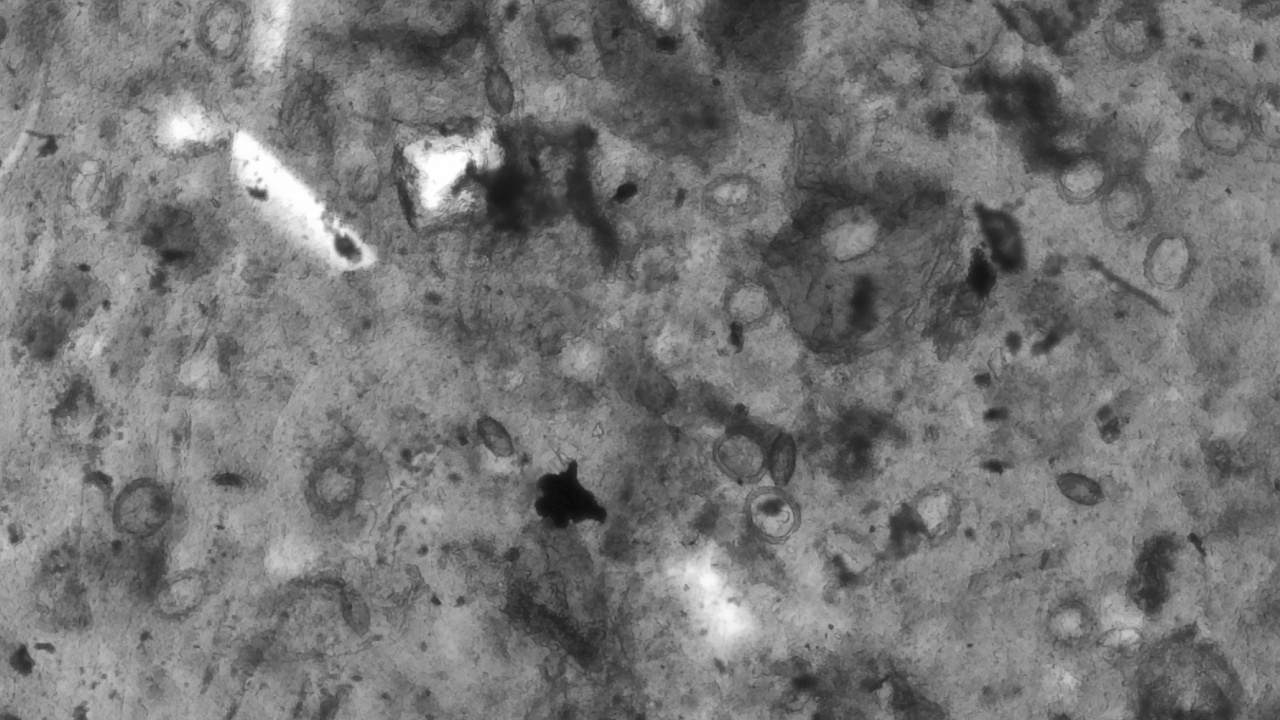

In [88]:
from PIL import Image, ImageOps

rcParams['figure.figsize'] = 20,10

tile_size = 150

#img = Image.open("img/0.0137_I03524_X007_Y019_Z5634.jpg") 
img = Image.open("img/0.0000_I03528_X007_Y019_Z5498.jpg") 
img_grey = ImageOps.grayscale(img)

img_crop = img.crop([0, 0, tile_size*int(img.width/tile_size), tile_size*int(img.height/tile_size)])
img_grey_crop = ImageOps.grayscale(img)

img.show()
img_grey.show()
img_crop.show()
img_grey_crop.show()


In [89]:
tiles = []

preds = []

height = img.height
width = img.width

trans = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.ConvertImageDtype(torch.float),
        ]
)
for row in range(0, int(height/tile_size)):
    preds.append([])
    for col in range(0, int(width/tile_size)):    
        x = col * tile_size
        y = row * tile_size
        
        cropped = trans(img.crop([x, y, x + tile_size, y + tile_size]))
        pred = model(cropped.unsqueeze(0)).numpy().flatten()[0]
        tiles.append((col, row, pred))
        preds[-1].append(pred)

preds = np.array(preds)
tiles


preds.shape

(4, 8)

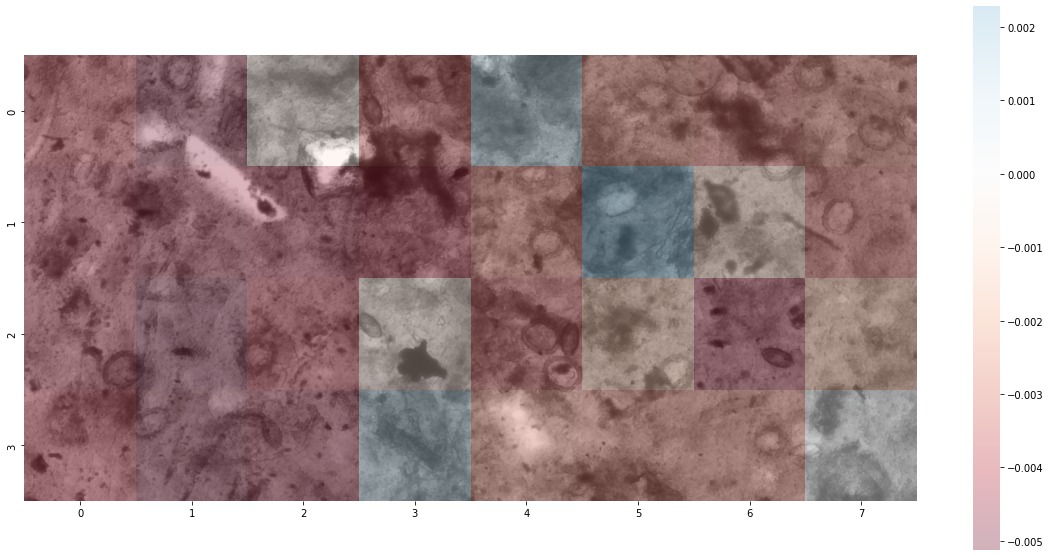

In [90]:
import seaborn as sns

hmax = sns.heatmap(preds, cmap='RdBu', alpha = 0.3, center=0, square=True)
hmax.imshow(img_grey_crop,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          cmap='gray',
          zorder = 0) #put the map under the heatmap

## Generating Heatmap with lower stripe

In [91]:
tiles = []

preds = []

combine_tiles = 3
stride = tile_size / combine_tiles


trans = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.ConvertImageDtype(torch.float),
        ]
)
for row in range(0, int(height/stride)):
    preds.append([])
    for col in range(0, int(width/stride)):    
        x = col * stride
        y = row * stride
        
        cropped = trans(img.crop([x, y, x + tile_size, y + tile_size]))
        pred = model(cropped.unsqueeze(0)).numpy().flatten()[0]
        tiles.append((col, row, pred))
        preds[-1].append(pred)

preds = np.array(preds)
tiles


preds.shape

(14, 25)

In [92]:
preds[0, :].shape

(25,)

In [93]:
data = []
for row_idx in range(preds.shape[0]):
    row = preds[row_idx, :]

    cols = []
    for col_idx in range(preds.shape[1]):
        val = row[col_idx]
        count = 0
        val = 0
        # Collect values from neightbours
        for left in range(combine_tiles):
            for down in range(combine_tiles):
                x = col_idx - left
                y = row_idx - down
                if x >= 0 and x < preds.shape[1] and y >= 0 and y < preds.shape[0]:
                    val += preds[y, x]
                    count += 1
        val /= max(count, 1)
        cols.append(val)
    data.append(cols)

                
data = np.array(data)
data.shape

(14, 25)

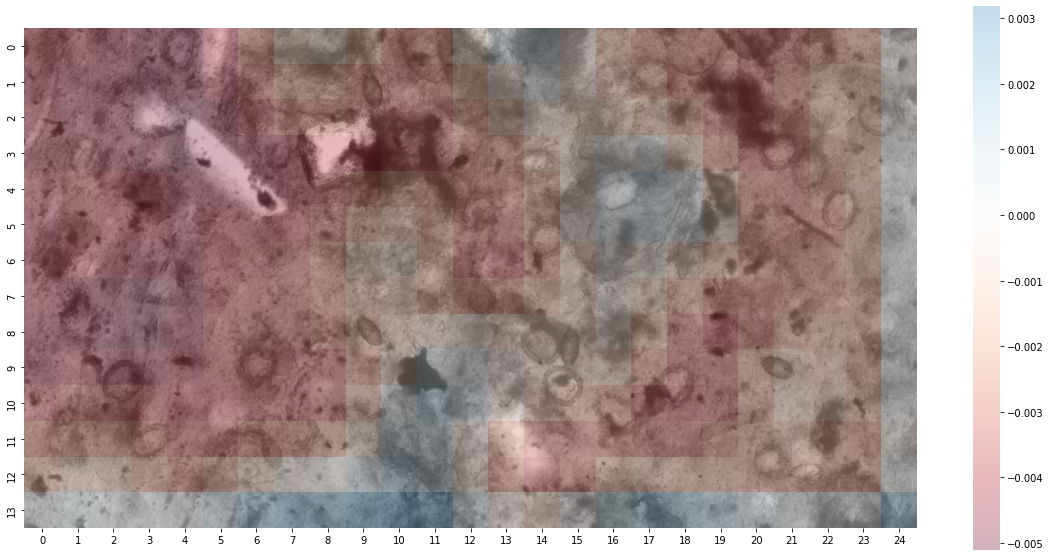

In [94]:
hmax = sns.heatmap(data, cmap='RdBu', alpha = 0.3, center=0, square=True)
hmax.imshow(img_grey_crop,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          cmap='gray',
          zorder = 0) #put the map under the heatmap